<a href="https://colab.research.google.com/github/Shipra-Kumar/SQL_Python_Sales_Data_Analysis_Project/blob/main/Python_%26_SQL_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sal
import os
from google.colab import files

uploaded = files.upload()
print("Uploaded Files:", os.listdir("/content"))

file_path = '/content/orders 2.csv'
df = pd.read_csv(file_path)


Saving orders 2.csv to orders 2.csv
Uploaded Files: ['.config', 'orders 2.csv', 'sample_data']


In [4]:
conn = sqlite3.connect(":memory:")

In [5]:

df = pd.read_csv('orders 2.csv')
df


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


In [6]:
# Previewing the dataset
print("Dataset Preview:")
print(df.head())

# Data Cleaning: Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Preview:
   Order Id  Order Date       Ship Mode    Segment        Country  \
0         1  2023-03-01    Second Class   Consumer  United States   
1         2  2023-08-15    Second Class   Consumer  United States   
2         3  2023-01-10    Second Class  Corporate  United States   
3         4  2022-06-18  Standard Class   Consumer  United States   
4         5  2022-07-13  Standard Class   Consumer  United States   

              City       State  Postal Code Region         Category  \
0        Henderson    Kentucky        42420  South        Furniture   
1        Henderson    Kentucky        42420  South        Furniture   
2      Los Angeles  California        90036   West  Office Supplies   
3  Fort Lauderdale     Florida        33311  South        Furniture   
4  Fort Lauderdale     Florida        33311  South  Office Supplies   

  Sub Category       Product Id  cost price  List Price  Quantity  \
0    Bookcases  FUR-BO-10001798         240         260         2   
1  

In [7]:
# Handling missing values
df = df.dropna()

In [8]:
#Analysing Data
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
          Order Id   Postal Code    cost price    List Price     Quantity  \
count  9993.000000   9993.000000   9993.000000   9993.000000  9993.000000   
mean   4997.988192  55192.137696    201.195837    229.763835     3.789853   
std    2884.895168  32064.815951    537.769763    623.276635     2.225046   
min       1.000000   1040.000000      0.000000      0.000000     1.000000   
25%    2500.000000  23223.000000     20.000000     20.000000     2.000000   
50%    4998.000000  56560.000000     50.000000     50.000000     3.000000   
75%    7496.000000  90008.000000    180.000000    210.000000     5.000000   
max    9994.000000  99301.000000  18110.000000  22640.000000    14.000000   

       Discount Percent  
count       9993.000000  
mean           3.483939  
std            1.114164  
min            2.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  


In [11]:
#deriving new columns- discount , sale price and profit
df.loc[:, 'discount'] = df['list_price'] * df['discount_percent'] * 0.01
df.loc[:, 'sales'] = df['list_price'] - df['discount']
df.loc[:, 'profit'] = df['sales'] - df['cost_price']
df

<ipython-input-11-0fb573b793b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'discount'] = df['list_price'] * df['discount_percent'] * 0.01
<ipython-input-11-0fb573b793b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'sales'] = df['list_price'] - df['discount']
<ipython-input-11-0fb573b793b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sales,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1,-0.9


In [10]:
#renaming column names (making them lower case and replacing space with underscore)
df.rename(columns={'Order Id':'order_id', 'City':'city'})
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df.head(5)


,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [12]:
#converting order date from object data type to datetime
df.loc[:, 'order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d")
df.dtypes


,0
order_id,int64
order_date,object
ship_mode,object
segment,object
country,object
city,object
state,object
postal_code,int64
region,object
category,object


In [13]:
# Aggregating Sales by Category
sales_by_category = df.groupby("category")["sales"].sum().reset_index()
print("\nSales by Category:")
print(sales_by_category)



Sales by Category:
          category     sales
0        Furniture  715340.7
1  Office Supplies  693492.5
2       Technology  806873.5


In [14]:
# Top Products by Sales
top_products = df.groupby("product_id")["sales"].sum().reset_index().sort_values(by="sales", ascending=False).head(10)
print("\nTop 10 Products by Sales:")
print(top_products)


Top 10 Products by Sales:
           product_id    sales
1614  TEC-CO-10004722  59514.0
776   OFF-BI-10003527  26525.3
1642  TEC-MA-10002412  21734.4
80    FUR-CH-10002024  21096.2
691   OFF-BI-10001359  19090.2
657   OFF-BI-10000545  18249.0
1604  TEC-CO-10001449  18151.2
1631  TEC-MA-10001127  17906.4
845   OFF-BI-10004995  17354.8
1420  OFF-SU-10000151  16325.8


<ipython-input-15-4e529fc04302>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category", y="sales", data=sales_by_category, palette="viridis")


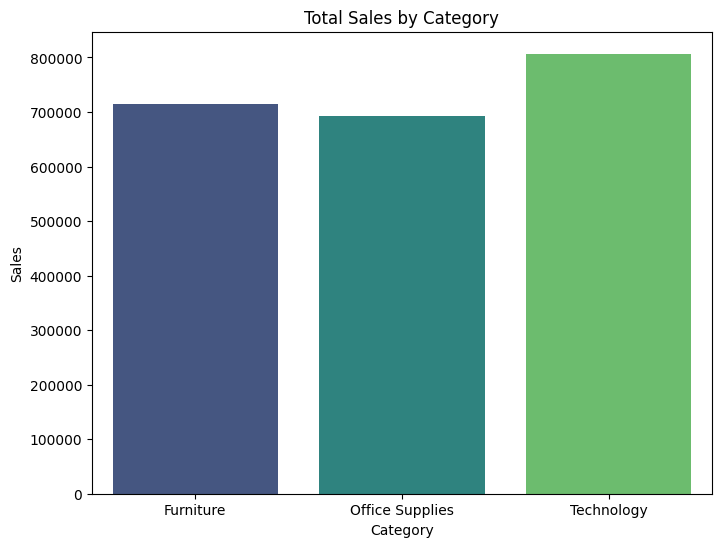

In [15]:
# Visualizing Sales by Category
plt.figure(figsize=(8, 6))
sns.barplot(x="category", y="sales", data=sales_by_category, palette="viridis")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()


In [16]:
# Profit Analysis
print("\nProfit Analysis by Category:")
profit_by_category = df.groupby("category")["profit"].sum().reset_index()
print(profit_by_category)


Profit Analysis by Category:
          category   profit
0        Furniture  66480.7
1  Office Supplies  62242.5
2       Technology  76433.5


<ipython-input-17-005091008b88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category", y="profit", data=profit_by_category, palette="plasma")


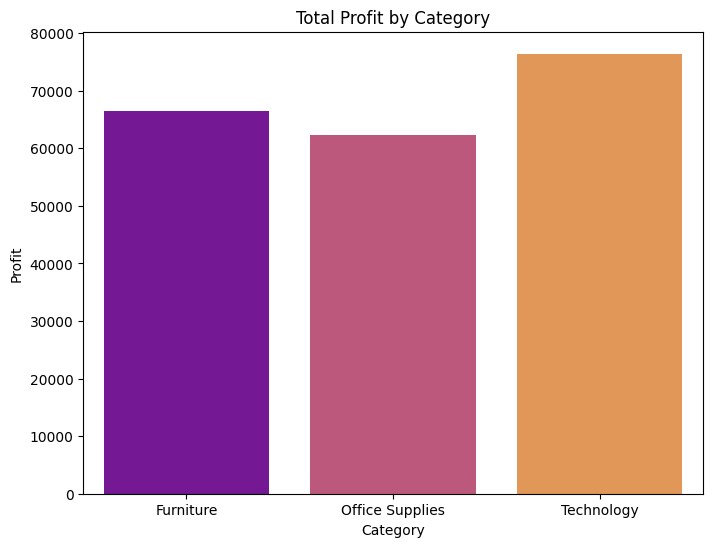

In [17]:
# Visualizing Profit by Category
plt.figure(figsize=(8, 6))
sns.barplot(x="category", y="profit", data=profit_by_category, palette="plasma")
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

In [18]:
# Correlation Analysis
numeric_df = df.select_dtypes(include=["number"])

# Computing the correlation matrix
correlation = numeric_df.corr()

print("\nCorrelation Matrix:")
print(correlation)



Correlation Matrix:
                  order_id  postal_code  cost_price  list_price  quantity  \
order_id          1.000000     0.009580   -0.001913   -0.001369 -0.004229   
postal_code       0.009580     1.000000   -0.023615   -0.023782  0.012693   
cost_price       -0.001913    -0.023615    1.000000    0.998132  0.202372   
list_price       -0.001369    -0.023782    0.998132    1.000000  0.200864   
quantity         -0.004229     0.012693    0.202372    0.200864  1.000000   
discount_percent -0.002967    -0.005250    0.004850    0.004771  0.014544   
discount         -0.001701    -0.024167    0.948879    0.952517  0.198518   
sales            -0.001354    -0.023723    0.998135    0.999932  0.200576   
profit            0.002955    -0.021623    0.862376    0.891137  0.162753   

                  discount_percent  discount     sales    profit  
order_id                 -0.002967 -0.001701 -0.001354  0.002955  
postal_code              -0.005250 -0.024167 -0.023723 -0.021623  
cost_pr

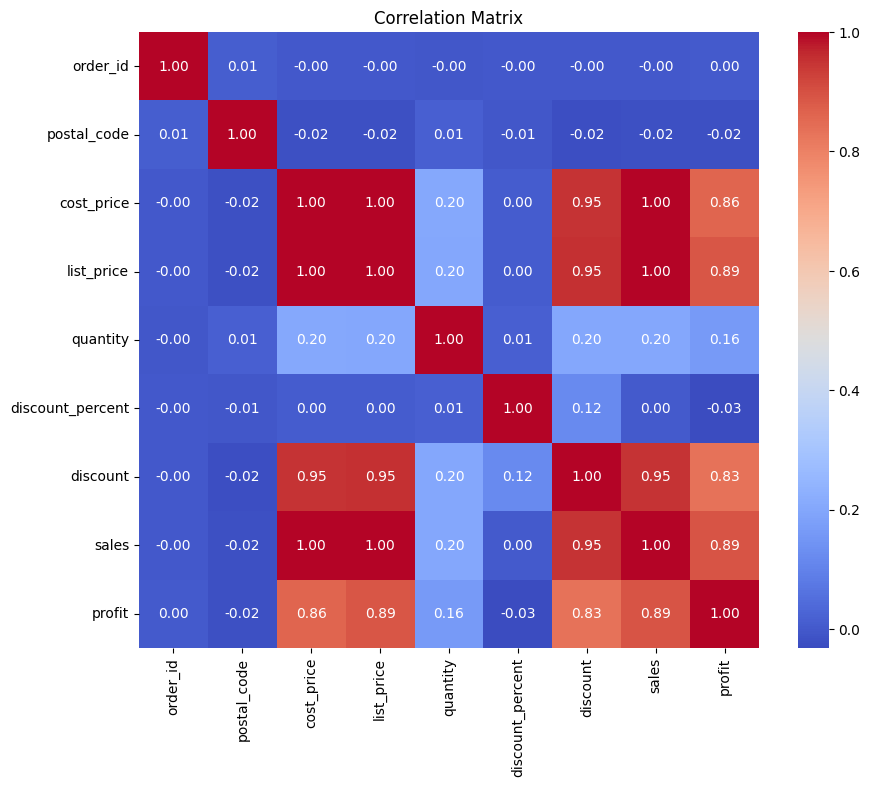

In [19]:
# Visualizing Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [26]:
# Monthly Sales Trend
df["order_date"] = pd.to_datetime(df["order_date"], errors='coerce')
df.loc[:, "month"] = df["order_date"].dt.to_period("M")
monthly_sales = df.groupby("month")["sales"].sum().reset_index()



<ipython-input-26-d8a2f47502ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_date"] = pd.to_datetime(df["order_date"], errors='coerce')
<ipython-input-26-d8a2f47502ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "month"] = df["order_date"].dt.to_period("M")


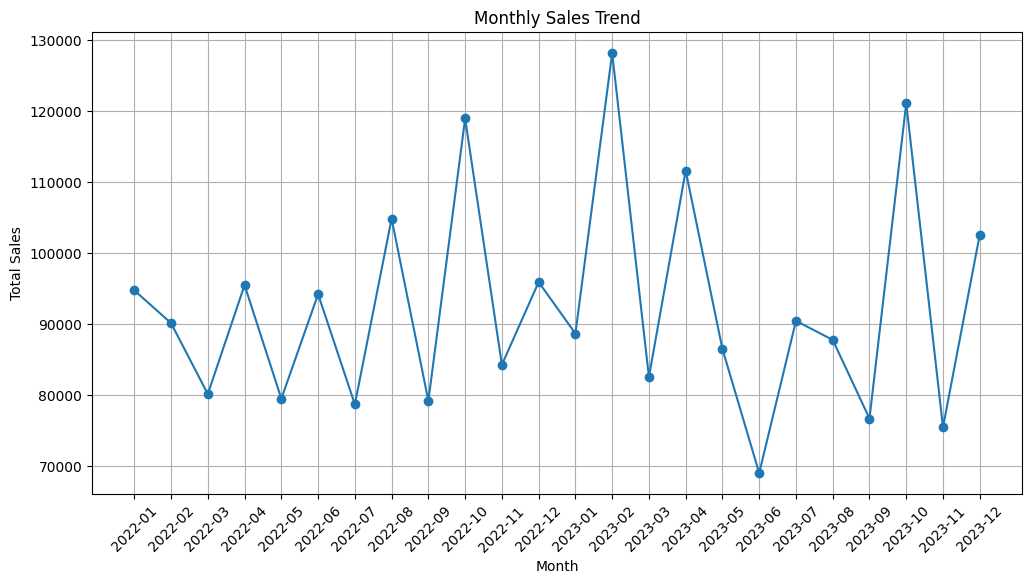

In [27]:
# Plotting Monthly Sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["month"].astype(str), monthly_sales["sales"], marker="o", linestyle="-")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [28]:
import os

# Getting current working directory
cwd = os.getcwd()
print("Current Working Directory:", cwd)

# Listing files in working directory
print("Files in current directory:", os.listdir(cwd))


Current Working Directory: /content
Files in current directory: ['.config', 'orders 2.csv', 'sample_data']


In [29]:
print("Data Preview:")
print(df.head())

Data Preview:
   order_id order_date       ship_mode    segment        country  \
0         1 2023-03-01    Second Class   Consumer  United States   
1         2 2023-08-15    Second Class   Consumer  United States   
2         3 2023-01-10    Second Class  Corporate  United States   
3         4 2022-06-18  Standard Class   Consumer  United States   
4         5 2022-07-13  Standard Class   Consumer  United States   

              city       state  postal_code region         category  \
0        Henderson    Kentucky        42420  South        Furniture   
1        Henderson    Kentucky        42420  South        Furniture   
2      Los Angeles  California        90036   West  Office Supplies   
3  Fort Lauderdale     Florida        33311  South        Furniture   
4  Fort Lauderdale     Florida        33311  South  Office Supplies   

  sub_category       product_id  cost_price  list_price  quantity  \
0    Bookcases  FUR-BO-10001798         240         260         2   
1       Chai

In [34]:
df = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':  # Converting object columns to string
        df[col] = df[col].astype(str)

In [36]:
# Ensuring 'month' is a string format
df["month"] = df["month"].astype(str)

# Saving DataFrame to SQLite
from sqlalchemy import create_engine

engine = create_engine("sqlite:///:memory:")  # In-memory SQLite database
conn = engine.connect()

# Saving DataFrame to SQLite
df.to_sql("orders", conn, index=False, if_exists="replace")

print("Data saved successfully!")


Data saved successfully!


In [37]:
query = "SELECT * FROM orders LIMIT 5"
result = pd.read_sql_query(query, conn)
print("\nFirst 5 Rows from SQL Query:")
print(result)


First 5 Rows from SQL Query:
   order_id                  order_date       ship_mode    segment  \
0         1  2023-03-01 00:00:00.000000    Second Class   Consumer   
1         2  2023-08-15 00:00:00.000000    Second Class   Consumer   
2         3  2023-01-10 00:00:00.000000    Second Class  Corporate   
3         4  2022-06-18 00:00:00.000000  Standard Class   Consumer   
4         5  2022-07-13 00:00:00.000000  Standard Class   Consumer   

         country             city       state  postal_code region  \
0  United States        Henderson    Kentucky        42420  South   
1  United States        Henderson    Kentucky        42420  South   
2  United States      Los Angeles  California        90036   West   
3  United States  Fort Lauderdale     Florida        33311  South   
4  United States  Fort Lauderdale     Florida        33311  South   

          category sub_category       product_id  cost_price  list_price  \
0        Furniture    Bookcases  FUR-BO-10001798         2

In [50]:
from sqlalchemy import text

# Defining query
query = text("""
SELECT category, SUM(sales) AS total_sales
FROM orders
GROUP BY category
ORDER BY total_sales DESC;
""")

# Executing query
result = conn.execute(query).fetchall()

# Displaying result
for row in result:
    print(row)


('Technology', 806873.4999999994)
('Furniture', 715340.6999999989)
('Office Supplies', 693492.4999999941)


In [51]:
from sqlalchemy import text

# Defining query
query = text("""
SELECT strftime('%Y-%m', order_date) AS month, SUM(sales) AS total_sales
FROM orders
GROUP BY month
ORDER BY month;
""")

# Executing query
result = conn.execute(query).fetchall()

# Displaying result
for row in result:
    print(row)



('2022-01', 94712.49999999997)
('2022-02', 90091.0)
('2022-03', 80105.99999999996)
('2022-04', 95451.60000000005)
('2022-05', 79448.29999999993)
('2022-06', 94170.49999999999)
('2022-07', 78652.20000000003)
('2022-08', 104807.99999999996)
('2022-09', 79142.19999999991)
('2022-10', 118912.69999999998)
('2022-11', 84225.29999999997)
('2022-12', 95869.90000000004)
('2023-01', 88632.6)
('2023-02', 128124.20000000011)
('2023-03', 82512.29999999994)
('2023-04', 111568.60000000006)
('2023-05', 86447.89999999994)
('2023-06', 68976.5)
('2023-07', 90411.79999999993)
('2023-08', 87733.59999999999)
('2023-09', 76658.59999999993)
('2023-10', 121061.49999999993)
('2023-11', 75432.79999999993)
('2023-12', 102556.09999999999)


In [52]:
import pandas as pd

# Converting result to pandas DataFrame
monthly_sales_df = pd.DataFrame(result, columns=["month", "total_sales"])
print(monthly_sales_df)


      month  total_sales
0   2022-01      94712.5
1   2022-02      90091.0
2   2022-03      80106.0
3   2022-04      95451.6
4   2022-05      79448.3
5   2022-06      94170.5
6   2022-07      78652.2
7   2022-08     104808.0
8   2022-09      79142.2
9   2022-10     118912.7
10  2022-11      84225.3
11  2022-12      95869.9
12  2023-01      88632.6
13  2023-02     128124.2
14  2023-03      82512.3
15  2023-04     111568.6
16  2023-05      86447.9
17  2023-06      68976.5
18  2023-07      90411.8
19  2023-08      87733.6
20  2023-09      76658.6
21  2023-10     121061.5
22  2023-11      75432.8
23  2023-12     102556.1


In [53]:
from sqlalchemy import text

# Defining query
query = text("""
WITH cte AS (
    SELECT
        region,
        product_id,
        SUM(sales) AS total_sales,
        ROW_NUMBER() OVER (PARTITION BY region ORDER BY SUM(sales) DESC) AS rn
    FROM orders
    GROUP BY region, product_id
)
SELECT region, product_id, total_sales
FROM cte
WHERE rn <= 5;
""")

# Executing query
result = conn.execute(query).fetchall()

# Converting result to pandas DataFrame
import pandas as pd

top_5_products_df = pd.DataFrame(result, columns=["region", "product_id", "total_sales"])
print(top_5_products_df)


     region       product_id  total_sales
0   Central  TEC-CO-10004722      16975.0
1   Central  TEC-MA-10000822      13770.0
2   Central  OFF-BI-10001120      11056.5
3   Central  OFF-BI-10000545      10132.7
4   Central  OFF-BI-10004995       8416.1
5      East  TEC-CO-10004722      29099.0
6      East  TEC-MA-10001047      13767.0
7      East  FUR-BO-10004834      11274.1
8      East  OFF-BI-10001359       8463.6
9      East  TEC-CO-10001449       8316.0
10    South  TEC-MA-10002412      21734.4
11    South  TEC-MA-10001127      11116.4
12    South  OFF-BI-10001359       8053.2
13    South  TEC-MA-10004125       7840.0
14    South  OFF-BI-10003527       7391.4
15     West  TEC-CO-10004722      13440.0
16     West  OFF-SU-10000151      12592.3
17     West  FUR-CH-10001215       9604.0
18     West  OFF-BI-10003527       7804.8
19     West  TEC-AC-10003832       7722.7


In [54]:
from sqlalchemy import text

# Defining query
query = text("""
WITH cte AS (
    SELECT
        CAST(strftime('%Y', order_date) AS INTEGER) AS order_year,
        CAST(strftime('%m', order_date) AS INTEGER) AS order_month,
        SUM(sales) AS total_sales
    FROM orders
    GROUP BY strftime('%Y-%m', order_date)
)
SELECT
    order_month,
    SUM(CASE WHEN order_year = 2022 THEN total_sales ELSE 0 END) AS sales_2022,
    SUM(CASE WHEN order_year = 2023 THEN total_sales ELSE 0 END) AS sales_2023
FROM cte
GROUP BY order_month
ORDER BY order_month;
""")

# Executing query
result = conn.execute(query).fetchall()

# Converting result to Pandas DataFrame
import pandas as pd

month_over_month_df = pd.DataFrame(result, columns=["order_month", "sales_2022", "sales_2023"])
print(month_over_month_df)


    order_month  sales_2022  sales_2023
0             1     94712.5     88632.6
1             2     90091.0    128124.2
2             3     80106.0     82512.3
3             4     95451.6    111568.6
4             5     79448.3     86447.9
5             6     94170.5     68976.5
6             7     78652.2     90411.8
7             8    104808.0     87733.6
8             9     79142.2     76658.6
9            10    118912.7    121061.5
10           11     84225.3     75432.8
11           12     95869.9    102556.1


In [55]:
from sqlalchemy import text

# Defining query
query = text("""
WITH cte AS (
    SELECT
        category,
        strftime('%Y%m', order_date) AS order_year_month,
        SUM(sales) AS total_sales
    FROM orders
    GROUP BY category, strftime('%Y%m', order_date)
)
SELECT category, order_year_month, total_sales
FROM (
    SELECT
        category,
        order_year_month,
        total_sales,
        ROW_NUMBER() OVER (PARTITION BY category ORDER BY total_sales DESC) AS rn
    FROM cte
) a
WHERE rn = 1;
""")

# Executing query
result = conn.execute(query).fetchall()

# Converting result to pandas DataFrame
import pandas as pd

highest_sales_by_category_df = pd.DataFrame(result, columns=["category", "order_year_month", "total_sales"])
print(highest_sales_by_category_df)


          category order_year_month  total_sales
0        Furniture           202210      42888.9
1  Office Supplies           202302      44118.5
2       Technology           202310      53000.1


In [56]:
from sqlalchemy import text

# Defining query
query = text("""
WITH cte AS (
    SELECT
        sub_category,
        CAST(strftime('%Y', order_date) AS INTEGER) AS order_year,
        SUM(profit) AS total_profit
    FROM orders
    GROUP BY sub_category, strftime('%Y', order_date)
),
cte2 AS (
    SELECT
        sub_category,
        SUM(CASE WHEN order_year = 2022 THEN total_profit ELSE 0 END) AS profit_2022,
        SUM(CASE WHEN order_year = 2023 THEN total_profit ELSE 0 END) AS profit_2023
    FROM cte
    GROUP BY sub_category
)
SELECT
    sub_category,
    profit_2022,
    profit_2023,
    (profit_2023 - profit_2022) AS profit_growth
FROM cte2
ORDER BY profit_growth DESC
LIMIT 1;
""")

# Executing query
result = conn.execute(query).fetchall()

# Converting result to pandas DataFrame
import pandas as pd

highest_growth_sub_category_df = pd.DataFrame(result, columns=["sub_category", "profit_2022", "profit_2023", "profit_growth"])
print(highest_growth_sub_category_df)


  sub_category  profit_2022  profit_2023  profit_growth
0     Machines       7243.2      10878.5         3635.3
